# Exploratory Data Analysis

Our POI Spending dataset is a cross-section from July 2025 filtered down to San Diego county.
Overall, we have 8537 records representing a specific business, location info, affiliated brand, business category/NAIC code, raw transaction and customer counts, as well as related cross-shopping percentages.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the joined spend & places data for San Diego County
# selecting only columns of interest
df = pd.read_parquet('data/san-diego-county-places-spend.parquet', columns=[
        'CITY', 'LATITUDE', 'LONGITUDE', 
        'POLYGON_WKT', 'POSTAL_CODE', 'REGION', 
        'STREET_ADDRESS', 'BRANDS', 
        'LOCATION_NAME', 
        'NAICS_CODE',
        'RAW_NUM_CUSTOMERS', 'RAW_NUM_TRANSACTIONS',
        'RAW_TOTAL_SPEND',
        'RELATED_CROSS_SHOPPING_LOCAL_BRANDS_PCT',
        'RELATED_CROSS_SHOPPING_ONLINE_MERCHANTS_PCT',
        'RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT',
        'RELATED_CROSS_SHOPPING_SAME_CATEGORY_BRANDS_PCT',
        'TOP_CATEGORY'])

In [4]:
print("\nData types:")
print(df.dtypes)
print("\nMissing values by column:")
print(df.isnull().sum())


Data types:
CITY                                                object
LATITUDE                                           float64
LONGITUDE                                          float64
POLYGON_WKT                                         object
POSTAL_CODE                                        float64
REGION                                              object
STREET_ADDRESS                                      object
BRANDS                                              object
LOCATION_NAME                                       object
NAICS_CODE                                         float64
RAW_NUM_CUSTOMERS                                  float64
RAW_NUM_TRANSACTIONS                               float64
RAW_TOTAL_SPEND                                    float64
RELATED_CROSS_SHOPPING_LOCAL_BRANDS_PCT             object
RELATED_CROSS_SHOPPING_ONLINE_MERCHANTS_PCT         object
RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT          object
RELATED_CROSS_SHOPPING_SAME_CATEGORY_BRANDS

In [5]:
df.head()

,CITY,LATITUDE,LONGITUDE,POLYGON_WKT,POSTAL_CODE,REGION,STREET_ADDRESS,BRANDS,LOCATION_NAME,NAICS_CODE,RAW_NUM_CUSTOMERS,RAW_NUM_TRANSACTIONS,RAW_TOTAL_SPEND,RELATED_CROSS_SHOPPING_LOCAL_BRANDS_PCT,RELATED_CROSS_SHOPPING_ONLINE_MERCHANTS_PCT,RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT,RELATED_CROSS_SHOPPING_SAME_CATEGORY_BRANDS_PCT,TOP_CATEGORY
0,Fallbrook,33.363182,-117.249713,POLYGON ((-117.24961958701293 33.3632514508898...,92028.0,CA,1625 S Mission Rd,[],Garden Center Cafe-Office,722320.0,6.0,8.0,521.66,"{""key_value"":[{""key"":""Albertsons"",""value"":67},...","{""key_value"":[{""key"":""Walmart"",""value"":17},{""k...","{""key_value"":[{""key"":""Walmart"",""value"":34},{""k...",None,Special Food Services
1,San Diego,32.962082,-117.189917,POLYGON ((-117.18968099635235 32.9621080316114...,92130.0,CA,5980 Village Way,Ever Bowl,Ever Bowl,722515.0,3.0,3.0,34.97,"{""key_value"":[{""key"":""McDonald's"",""value"":34},...","{""key_value"":[{""key"":""Chili's"",""value"":34},{""k...","{""key_value"":[{""key"":""Trader Joe's"",""value"":67...","{""key_value"":[{""key"":""Menchie's"",""value"":34},{...",Restaurants and Other Eating Places
2,Poway,32.950256,-117.062976,"POLYGON ((-117.062901490944 32.95036774128007,...",92064.0,CA,12906 Pomerado Rd,[],Pw Mart,445310.0,4.0,8.0,103.00,"{""key_value"":[{""key"":""Trader Joe's"",""value"":25...","{""key_value"":[{""key"":""Walmart"",""value"":25},{""k...","{""key_value"":[{""key"":""IHOP"",""value"":25},{""key""...",None,"Beer, Wine, and Liquor Stores"
3,San Diego,32.979783,-117.082701,POLYGON ((-117.08280491270557 32.9798247527082...,92128.0,CA,11134 Rancho Carmel Dr Ste 104,Chipotle Mexican Grill,Chipotle Mexican Grill,722513.0,85.0,122.0,2280.48,"{""key_value"":[{""key"":""Chevron"",""value"":8},{""ke...","{""key_value"":[{""key"":""Walmart"",""value"":8},{""ke...","{""key_value"":[{""key"":""Walmart"",""value"":33},{""k...","{""key_value"":[{""key"":""Sonic"",""value"":6},{""key""...",Restaurants and Other Eating Places
4,Fallbrook,33.372348,-117.252617,POLYGON ((-117.25238131748273 33.3721978555450...,92028.0,CA,1101 S Main Ave Ste B,Kahoots Pet Products,Kahoots Pet Products,453910.0,3.0,4.0,206.58,"{""key_value"":[{""key"":""Albertsons"",""value"":34},...","{""key_value"":[{""key"":""Anytime Fitness"",""value""...","{""key_value"":[{""key"":""Walmart"",""value"":34},{""k...",None,Other Miscellaneous Store Retailers


## Geographic Distribution of Businesses

In [6]:
# summary stats
df['CITY'].value_counts().describe()

count      51.000000
mean      167.392157
std       524.427462
min         1.000000
25%         3.000000
50%        29.000000
75%       159.000000
max      3704.000000
Name: count, dtype: float64

In [7]:
# list of unique cities
df['CITY'].unique()

array(['Fallbrook', 'San Diego', 'Poway', 'San Marcos', 'Carlsbad',
       'El Cajon', 'Cardiff by the Sea', 'Chula Vista', 'Valley Center',
       'La Jolla', 'Escondido', 'Spring Valley', 'Dulzura', 'Ramona',
       'National City', 'Cardiff', 'Oceanside', 'Encinitas', 'La Mesa',
       'Solana Beach', 'Vista', 'Coronado', 'Del Mar', 'Santee',
       'San Ysidro', 'Lakeside', 'Alpine', 'Imperial Beach',
       'Lemon Grove', 'Bonita', 'Jamul', 'Boulevard', 'Julian',
       'Camp Pendleton', 'Jacumba', 'Bonsall', 'Jacumba Hot Springs',
       'Campo', 'Santa Ysabel', 'Otay Mesa', 'Camp Pendleton North',
       'Diego', 'Borrego Springs', 'Pine Valley', 'Pauma Valley',
       'Palomar Mountain', 'Camp Pendleton South', 'Pala',
       'Camino Real Oceanside', 'Descanso', 'Tecate'], dtype=object)

### Business Count by City

Observations
1. The city of San Diego is a far outlier in terms business count (3704), with Oceanside as a distant second (535)

In [8]:
df['CITY'].value_counts().head(10)

CITY
San Diego        3704
Oceanside         535
Chula Vista       521
Escondido         432
Carlsbad          429
El Cajon          378
San Marcos        243
Encinitas         235
National City     223
La Mesa           213
Name: count, dtype: int64

In [18]:
df_customers = df[['CITY', 'RAW_NUM_CUSTOMERS']].sort_values(by='RAW_NUM_CUSTOMERS', ascending=False)
df_customers = df_customers.head(15)

<Figure size 1200x700 with 0 Axes>

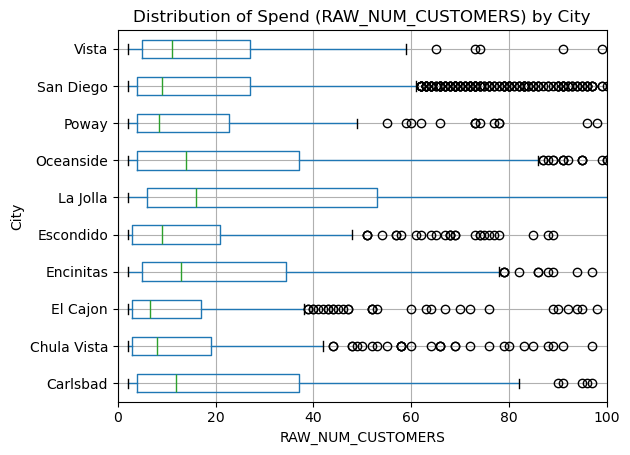

In [24]:
top_cities_by_customers = df.groupby('CITY')['RAW_NUM_CUSTOMERS'].sum().sort_values(ascending=False).head(10).index
df_top_cities = df[df['CITY'].isin(top_cities_by_customers)]


plt.figure(figsize=(12, 7))
df_top_cities.boxplot(column='RAW_NUM_CUSTOMERS', by='CITY', vert=False, showfliers=True)
plt.title('Distribution of Spend (RAW_NUM_CUSTOMERS) by City')
plt.suptitle('')
plt.xlabel('RAW_NUM_CUSTOMERS')
plt.ylabel('City')
plt.xlim([0, 100])
plt.tight_layout()
plt.show();



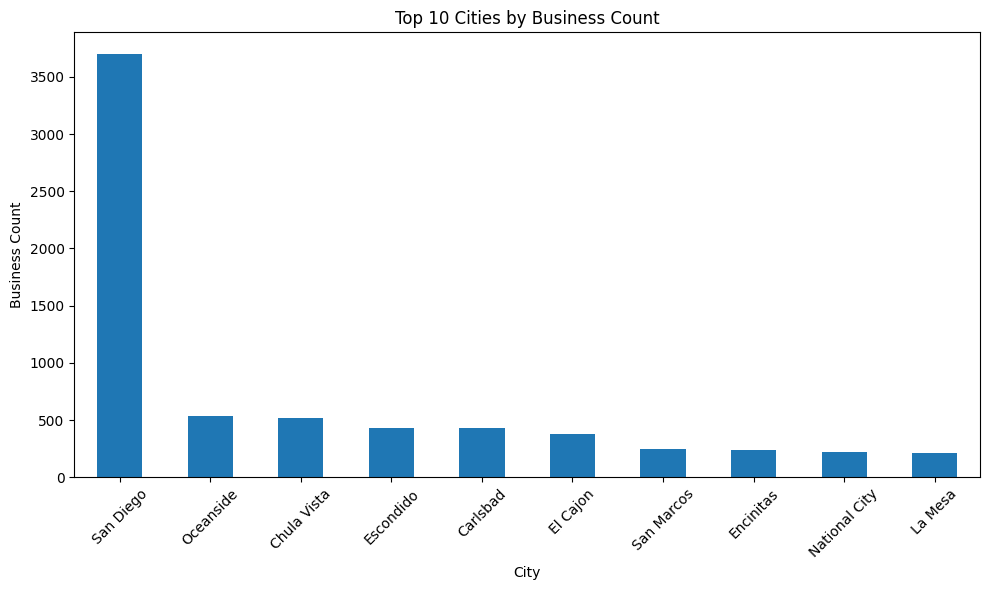

In [24]:
# top 10 cities by business count
top_10_cities = df['CITY'].value_counts().head(10)
bottom_10_cities = df['CITY'].value_counts().tail(10)

# plot the top 10 cities
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities by Business Count')
plt.xlabel('City')
plt.ylabel('Business Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


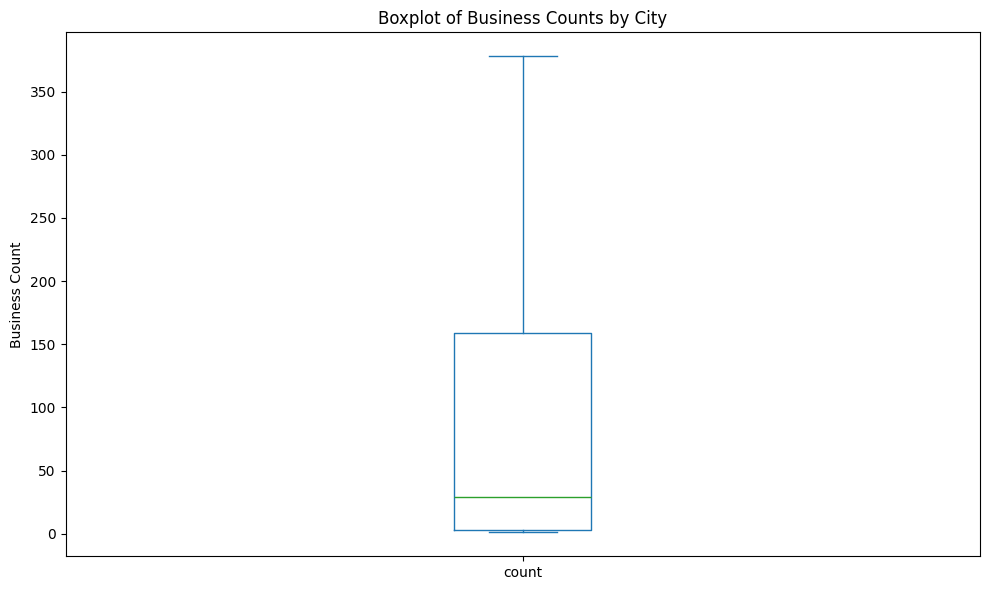

In [25]:
# plot boxplot of business counts by city exluding outliers (removes extreme cities like San Diego)
plt.figure(figsize=(10, 6))
df['CITY'].value_counts().plot(kind='box', showfliers=False)
plt.title('Boxplot of Business Counts by City')
plt.ylabel('Business Count')
plt.tight_layout()
plt.show()      

### Business Count by Zipcode

1. Dataset contains only 105 unique zipcodes despite originally filtering for 192 zipcodes during data prep
2. 92101 (Downtown San Diego), 92054 (Oceanside), 92008 (Carlsbad), 92108 (Mission Valley), 92110 (Old Towne/Point Loma) 

In [26]:
# total number of unique zipcodes
zipcodes = df['POSTAL_CODE'].unique()
print(f'Total number of unique Zipcodes: {len(zipcodes)}')

Total number of unique Zipcodes: 105


In [27]:
df['POSTAL_CODE'].value_counts()

POSTAL_CODE
92101.0    406
92054.0    286
92008.0    252
92108.0    244
92110.0    243
          ... 
92140.0      1
91943.0      1
91917.0      1
92171.0      1
92161.0      1
Name: count, Length: 105, dtype: int64

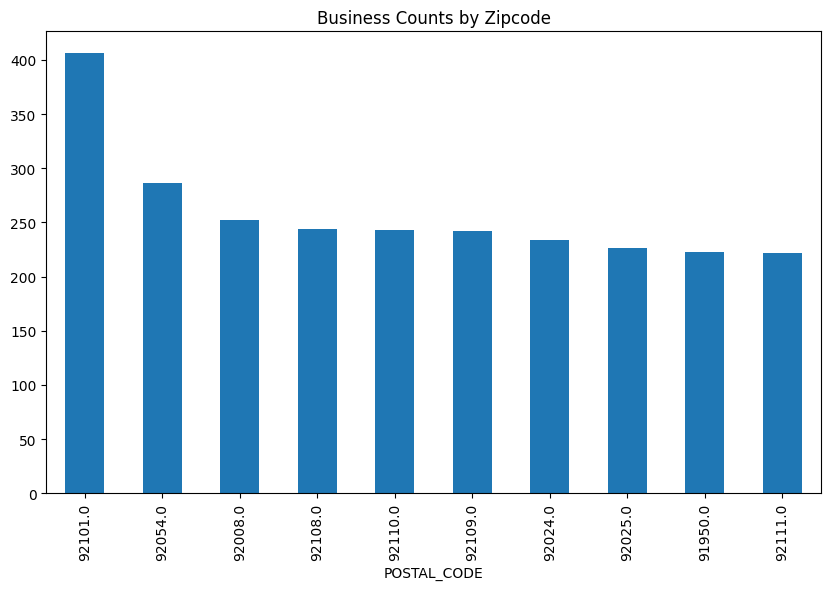

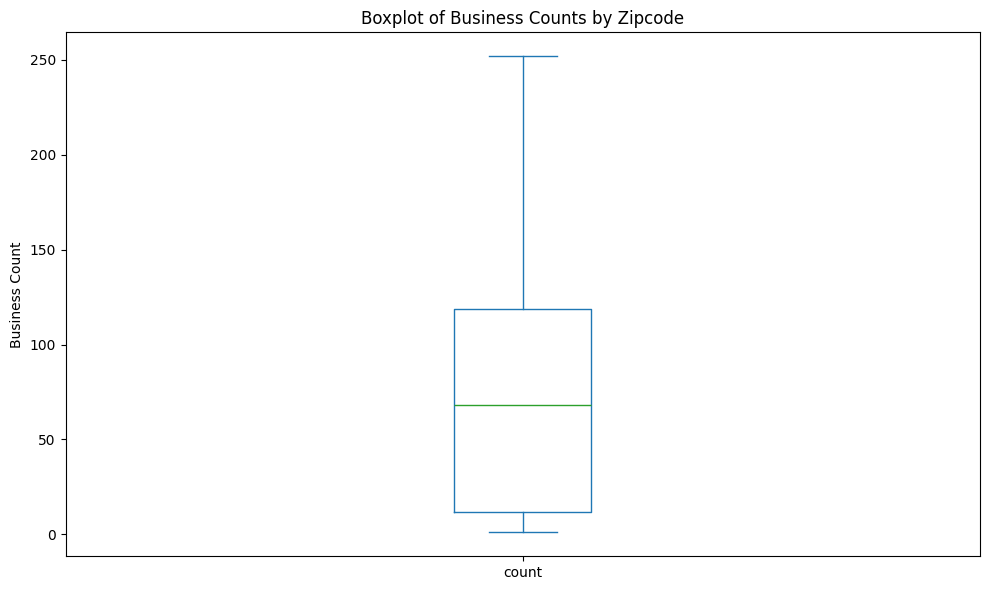

In [28]:
# top 10 zipcodes by business count
df['POSTAL_CODE'].value_counts().head(10)

# plot a barchart of the top 10 zipcodes by business count
plt.figure(figsize=(10, 6))
plt.title('Business Counts by Zipcode')
df['POSTAL_CODE'].value_counts().head(10).plot(kind='bar')

# plot boxplot of business counts by zipcode exluding outliers
plt.figure(figsize=(10, 6))
df['POSTAL_CODE'].value_counts().plot(kind='box', showfliers=False)
plt.title('Boxplot of Business Counts by Zipcode')
plt.ylabel('Business Count')
plt.tight_layout()
plt.show()

## Business Categories

In [29]:
df['TOP_CATEGORY'].value_counts()

TOP_CATEGORY
Restaurants and Other Eating Places                                       3463
Grocery Stores                                                             664
Personal Care Services                                                     342
Clothing Stores                                                            335
Gasoline Stations                                                          323
                                                                          ... 
Machine Shops; Turned Product; and Screw, Nut, and Bolt Manufacturing        1
Transit and Ground Passenger Transportation                                  1
Scenic and Sightseeing Transportation                                        1
Semiconductor and Other Electronic Component Manufacturing                   1
Religious, Grantmaking, Civic, Professional, and Similar Organizations       1
Name: count, Length: 142, dtype: int64

In [30]:
df['NAICS_CODE'].value_counts()

NAICS_CODE
722511.0    1341
722513.0    1246
722515.0     786
445110.0     373
447110.0     319
            ... 
485.0          1
4821.0         1
332710.0       1
8134.0         1
2361.0         1
Name: count, Length: 276, dtype: int64

In [31]:
# top 5 business categories by city
df.groupby(['CITY', 'TOP_CATEGORY']).size().groupby('CITY').nlargest(5)

CITY    CITY    TOP_CATEGORY                       
Alpine  Alpine  Restaurants and Other Eating Places    17
                Clothing Stores                         6
                Beer, Wine, and Liquor Stores           2
                Grocery Stores                          2
                Health and Personal Care Stores         2
                                                       ..
Vista   Vista   Restaurants and Other Eating Places    79
                Grocery Stores                         20
                Beer, Wine, and Liquor Stores          13
                Automotive Repair and Maintenance      10
                Gasoline Stations                       8
Length: 197, dtype: int64

## Businesses by Total Customer

In [46]:
# businesses by total number of customers
df.sort_values(by='RAW_NUM_CUSTOMERS', ascending=False)[['LOCATION_NAME', 'RAW_NUM_CUSTOMERS', 'RAW_NUM_TRANSACTIONS', 'RAW_TOTAL_SPEND', 'CITY', 'TOP_CATEGORY']]

,LOCATION_NAME,RAW_NUM_CUSTOMERS,RAW_NUM_TRANSACTIONS,RAW_TOTAL_SPEND,CITY,TOP_CATEGORY
7181,A,26449.0,55071.0,3514335.92,San Diego,Legal Services
3511,A,18043.0,36735.0,2156399.84,San Diego,Offices of Dentists
1486,Lively,5100.0,5405.0,212650.80,San Diego,Management of Companies and Enterprises
4175,A,5040.0,7905.0,546383.93,Chula Vista,Lessors of Real Estate
1419,Seaworld Parks And Entertainment,3803.0,9727.0,306377.54,San Diego,Amusement Parks and Arcades
...,...,...,...,...,...,...
389,Scripps La Jolla Cafet,2.0,3.0,33.27,La Jolla,Restaurants and Other Eating Places
6714,Penske Truck Rental,2.0,2.0,3642.41,Oceanside,Automotive Equipment Rental and Leasing
1281,Lakeside Car Wash,2.0,2.0,6.00,Lakeside,Automotive Repair and Maintenance
6716,Wahoo's Fish Taco,2.0,2.0,43.05,Encinitas,Restaurants and Other Eating Places


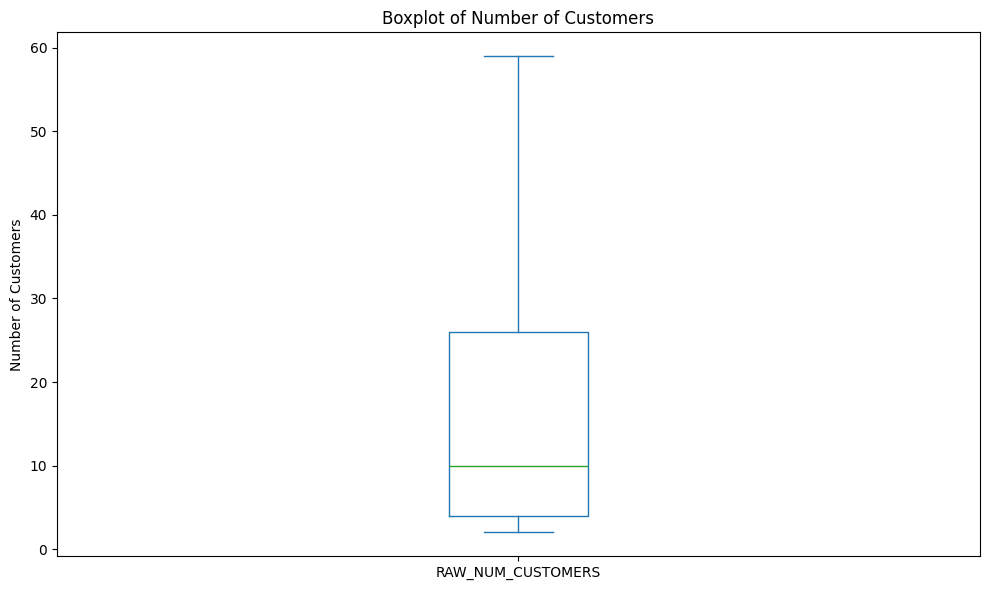

In [41]:
# plot boxplot of number of customers excluding outliers
plt.figure(figsize=(10, 6))
df['RAW_NUM_CUSTOMERS'].plot(kind='box', showfliers=False)
plt.title('Boxplot of Number of Customers')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()  